In [1]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
compthink
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

# Pandas

A data table is called a `DataFrame` in pandas (and other programming environments too).

The figure below from https://pandas.pydata.org/docs/getting_started/index.html illustrates a dataframe model:

![](01-table-dataframe.png) 

Each column and each row in a dataframe is called a series, the header row, and index column are special.

To use pandas, we need to import the module, generally pandas has numpy as a dependency so it also must be imported


In [3]:
import numpy as np #Importing NumPy library as "np"
import pandas as pd #Importing Pandas library as "pd"

# Dataframe-structure using primative python

First lets construct a dataframe like object using python primatives.
We will construct 3 lists, one for row names, one for column names, and one for the content.

In [4]:
mytabular = np.random.randint(1,100,(5,4))
myrowname = ['A','B','C','D','E']
mycolname = ['W','X','Y','Z']
mytable = [['' for jcol in range(len(mycolname)+1)] for irow in range(len(myrowname)+1)] #non-null destination matrix, note the implied loop construction

The above builds a placeholder named `mytable` for the psuedo-dataframe.
Next we populate the table, using a for loop to write the column names in the first row, row names in the first column, and the table fill for the rest of the table.

In [5]:
for irow in range(1,len(myrowname)+1): # write the row names
    mytable[irow][0]=myrowname[irow-1]
for jcol in range(1,len(mycolname)+1): # write the column names
    mytable[0][jcol]=mycolname[jcol-1]  
for irow in range(1,len(myrowname)+1): # fill the table (note the nested loop)
    for jcol in range(1,len(mycolname)+1):
        mytable[irow][jcol]=mytabular[irow-1][jcol-1]

Now lets print the table out by row and we see we have a very dataframe-like structure

In [6]:
for irow in range(0,len(myrowname)+1):
    print(mytable[irow][0:len(mycolname)+1])

['', 'W', 'X', 'Y', 'Z']
['A', 96, 59, 28, 92]
['B', 58, 24, 89, 10]
['C', 89, 44, 51, 57]
['D', 25, 62, 61, 55]
['E', 98, 4, 55, 96]


We can also query by row 

In [7]:
print(mytable[3][0:len(mycolname)+1])

['C', 89, 44, 51, 57]


Or by column

In [8]:
for irow in range(0,len(myrowname)+1):  #cannot use implied loop in a column slice
    print(mytable[irow][2])

X
59
24
44
62
4


Or by row+column index; sort of looks like a spreadsheet syntax.

In [9]:
print(' ',mytable[0][3])
print(mytable[3][0],mytable[3][3])

  Y
C 51


# Create a proper dataframe
We will now do the same using pandas

In [10]:
df = pd.DataFrame(np.random.randint(1,100,(5,4)), ['A','B','C','D','E'], ['W','X','Y','Z'])
df

,W,X,Y,Z
A,3,98,11,64
B,81,96,19,97
C,76,22,97,34
D,8,17,16,26
E,67,79,73,64


We can also turn our table into a dataframe, notice how the constructor adds header row and index column

In [11]:
df1 = pd.DataFrame(mytable)
df1

,0,1,2,3,4
0,,W,X,Y,Z
1,A,96,59,28,92
2,B,58,24,89,10
3,C,89,44,51,57
4,D,25,62,61,55
5,E,98,4,55,96


To get proper behavior, we can just reuse our original objects

In [12]:
df2 = pd.DataFrame(mytabular,myrowname,mycolname)
df2

,W,X,Y,Z
A,96,59,28,92
B,58,24,89,10
C,89,44,51,57
D,25,62,61,55
E,98,4,55,96


### Getting the shape of dataframes

The shape method will return the row and column rank (count) of a dataframe.


In [13]:
df.shape

(5, 4)

In [14]:
df1.shape

(6, 5)

In [15]:
df2.shape

(5, 4)

### Appending new columns
To append a column simply assign a value to a new column name to the dataframe

In [16]:
df['new']= 'NA'
df

,W,X,Y,Z,new
A,3,98,11,64,NA
B,81,96,19,97,NA
C,76,22,97,34,NA
D,8,17,16,26,NA
E,67,79,73,64,NA


## Appending new rows
A bit trickier but we can create a copy of a row and concatenate it back into the dataframe.

In [17]:
newrow = df.loc[['E']].rename(index={"E": "X"}) # create a single row, rename the index
newtable = pd.concat([df,newrow]) # concatenate the row to bottom of df - note the syntax

In [18]:
newtable

,W,X,Y,Z,new
A,3,98,11,64,NA
B,81,96,19,97,NA
C,76,22,97,34,NA
D,8,17,16,26,NA
E,67,79,73,64,NA
X,67,79,73,64,NA


### Removing Rows and Columns

To remove a column is straightforward, we use the drop method

In [19]:
newtable.drop('new', axis=1, inplace = True)
newtable

,W,X,Y,Z
A,3,98,11,64
B,81,96,19,97
C,76,22,97,34
D,8,17,16,26
E,67,79,73,64
X,67,79,73,64


To remove a row, you really got to want to, easiest is probablty to create a new dataframe with the row removed

In [20]:
newtable = newtable.loc[['A','B','D','E','X']] # select all rows except C
newtable

,W,X,Y,Z
A,3,98,11,64
B,81,96,19,97
D,8,17,16,26
E,67,79,73,64
X,67,79,73,64


# Indexing
We have already been indexing, but a few examples follow:

In [21]:
newtable['X'] #Selecing a single column

A    98
B    96
D    17
E    79
X    79
Name: X, dtype: int64

In [22]:
newtable[['X','W']] #Selecing a multiple columns

,X,W
A,98,3
B,96,81
D,17,8
E,79,67
X,79,67


In [23]:
newtable.loc['E'] #Selecing rows based on label via loc[ ] indexer

W    67
X    79
Y    73
Z    64
Name: E, dtype: int64

In [24]:
newtable.loc[['E','X','B']] #Selecing multiple rows based on label via loc[ ] indexer

,W,X,Y,Z
E,67,79,73,64
X,67,79,73,64
B,81,96,19,97


In [25]:
newtable.loc[['B','E','D'],['X','Y']] #Selecting elemens via both rows and columns via loc[ ] indexer

,X,Y
B,96,19
E,79,73
D,17,16


# Partition (slice)

# Conditional Selection

In [26]:
df = pd.DataFrame({'col1':[1,2,3,4,5,6,7,8],
                   'col2':[444,555,666,444,666,111,222,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
df

,col1,col2,col3
0,1,444,orange
1,2,555,apple
2,3,666,grape
3,4,444,mango
4,5,666,jackfruit
5,6,111,watermelon
6,7,222,banana
7,8,222,peach


In [27]:
#What fruit corresponds to the number 555 in ‘col2’?

df[df['col2']==555]['col3']

1    apple
Name: col3, dtype: object

In [28]:
#What fruit corresponds to the minimum number in ‘col2’?

df[df['col2']==df['col2'].min()]['col3']

5    watermelon
Name: col3, dtype: object

# Descriptor Functions

In [29]:
#Creating a dataframe from a dictionary

df = pd.DataFrame({'col1':[1,2,3,4,5,6,7,8],
                   'col2':[444,555,666,444,666,111,222,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
df

,col1,col2,col3
0,1,444,orange
1,2,555,apple
2,3,666,grape
3,4,444,mango
4,5,666,jackfruit
5,6,111,watermelon
6,7,222,banana
7,8,222,peach


### `head` method

Returns the first few rows, useful to infer structure

In [30]:
#Returns only the first five rows

df.head()

,col1,col2,col3
0,1,444,orange
1,2,555,apple
2,3,666,grape
3,4,444,mango
4,5,666,jackfruit


### `info` method

Returns the data model (data column count, names, data types)

In [31]:
#Info about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    8 non-null      int64 
 1   col2    8 non-null      int64 
 2   col3    8 non-null      object
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


### `describe` method

Returns summary statistics of each numeric column.  
Also returns the minimum and maximum value in each column, and the IQR (Interquartile Range).  
Again useful to understand structure of the columns.

In [32]:
#Statistics of the dataframe

df.describe()

,col1,col2
count,8.00000,8.0000
mean,4.50000,416.2500
std,2.44949,211.8576
min,1.00000,111.0000
25%,2.75000,222.0000
50%,4.50000,444.0000
75%,6.25000,582.7500
max,8.00000,666.0000


### Counting and Sum methods

There are also methods for counts and sums by specific columns

In [33]:
df['col2'].sum() #Sum of a specified column

3330

The `unique` method returns a list of unique values (filters out duplicates in the list, underlying dataframe is preserved)

In [34]:
df['col2'].unique() #Returns the list of unique values along the indexed column 

array([444, 555, 666, 111, 222])

The `nunique` method returns a count of unique values

In [35]:
df['col2'].nunique() #Returns the total number of unique values along the indexed column 

5

The `value_counts()` method returns the count of each unique value (kind of like a histogram, but each value is the bin)

In [36]:
df['col2'].value_counts()  #Returns the number of occurences of each unique value

222    2
444    2
666    2
111    1
555    1
Name: col2, dtype: int64

## Using functions in dataframes - symbolic apply

The power of pandas is an ability to apply a function to each element of a dataframe series (or a whole frame) by a technique called symbolic (or synthetic programming) application of the function.

Its pretty complicated but quite handy, best shown by an example

In [37]:
def times2(x):  # A prototype function to scalar multiply an object x by 2
    return(x*2)

print(df)
print('Apply the times2 function to col2')
df['col2'].apply(times2) #Symbolic apply the function to each element of column col2, result is another dataframe

   col1  col2        col3
0     1   444      orange
1     2   555       apple
2     3   666       grape
3     4   444       mango
4     5   666   jackfruit
5     6   111  watermelon
6     7   222      banana
7     8   222       peach
Apply the times2 function to col2


0     888
1    1110
2    1332
3     888
4    1332
5     222
6     444
7     444
Name: col2, dtype: int64

## Sorts 

In [38]:
df.sort_values('col2', ascending = True) #Sorting based on columns 

,col1,col2,col3
5,6,111,watermelon
6,7,222,banana
7,8,222,peach
0,1,444,orange
3,4,444,mango
1,2,555,apple
2,3,666,grape
4,5,666,jackfruit


## Exercise 1
Create a prototype function to compute the cube root of a numeric object (literally two lines to define the function), recall exponentation is available in primative python.

Apply your function to column **'X'** of dataframe **`newtable`** created above

# Aggregating (Grouping Values) dataframe contents


In [39]:
#Creating a dataframe from a dictionary

data = {
    'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1' : [1, 2, 3, 4, 5, 6],
    'data2' : [10, 11, 12, 13, 14, 15],
    'data3' : [20, 21, 22, 13, 24, 25]
}

df1 = pd.DataFrame(data)
df1

,key,data1,data2,data3
0,A,1,10,20
1,B,2,11,21
2,C,3,12,22
3,A,4,13,13
4,B,5,14,24
5,C,6,15,25


In [40]:
# Grouping and summing values in all the columns based on the column 'key'

df1.groupby('key').sum()

,data1,data2,data3
key,,,
A,5,23,33
B,7,25,45
C,9,27,47


In [41]:
# Grouping and summing values in the selected columns based on the column 'key'

df1.groupby('key')[['data1', 'data2']].sum()

,data1,data2
key,,
A,5,23
B,7,25
C,9,27


# Filtering out missing values

In [42]:
#Creating a dataframe from a dictionary

df = pd.DataFrame({'col1':[1,2,3,4,None,6,7,None],
                   'col2':[444,555,None,444,666,111,None,222],
                   'col3':['orange','apple','grape','mango','jackfruit','watermelon','banana','peach']})
df

,col1,col2,col3
0,1.0,444.0,orange
1,2.0,555.0,apple
2,3.0,NaN,grape
3,4.0,444.0,mango
4,NaN,666.0,jackfruit
5,6.0,111.0,watermelon
6,7.0,NaN,banana
7,NaN,222.0,peach


Below we drop any row that contains a `NaN` code.

In [43]:
df_dropped = df.dropna()
df_dropped

,col1,col2,col3
0,1.0,444.0,orange
1,2.0,555.0,apple
3,4.0,444.0,mango
5,6.0,111.0,watermelon


Below we replace `NaN` codes with some value, in this case 0

In [44]:
df_filled1 = df.fillna(0)
df_filled1

,col1,col2,col3
0,1.0,444.0,orange
1,2.0,555.0,apple
2,3.0,0.0,grape
3,4.0,444.0,mango
4,0.0,666.0,jackfruit
5,6.0,111.0,watermelon
6,7.0,0.0,banana
7,0.0,222.0,peach


Below we replace `NaN` codes with some value, in this case the mean value of of the column in which the missing value code resides.

In [45]:
df_filled2 = df.fillna(df.mean())
df_filled2

,col1,col2,col3
0,1.000000,444.0,orange
1,2.000000,555.0,apple
2,3.000000,407.0,grape
3,4.000000,444.0,mango
4,3.833333,666.0,jackfruit
5,6.000000,111.0,watermelon
6,7.000000,407.0,banana
7,3.833333,222.0,peach


## Exercise 2
Replace the **'NaN'** codes with the string 'missing' in dataframe **'df'**

# Reading a File into a Dataframe

Pandas has methods to read common file types, such as `csv`,`xlsx`, and `json`.  Ordinary text files are also quite manageable.

On a machine you control you can write script to retrieve files from the internet and process them.

On `CoCalc` you have to manually upload the target file to the directory where the script resides.  The system commands `wget` and `curl` are blocked in the free accounts.

In [46]:
readfilecsv = pd.read_csv('CSV_ReadingFile.csv')  #Reading a .csv file
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


Similar to reading and writing .csv files, you can also read and write .xslx files as below (useful to know this)

In [47]:
readfileexcel = pd.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1') #Reading a .xlsx file
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


# Writing a dataframe to file

In [48]:
#Creating and writing to a .csv file
readfilecsv = pd.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile1.csv')
readfilecsv = pd.read_csv('CSV_WritingFile1.csv')
print(readfilecsv)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


In [49]:
#Creating and writing to a .csv file by excluding row labels 
readfilecsv = pd.read_csv('CSV_ReadingFile.csv')
readfilecsv.to_csv('CSV_WritingFile2.csv', index = False)
readfilecsv = pd.read_csv('CSV_WritingFile2.csv')
print(readfilecsv)

    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [50]:
#Creating and writing to a .xlsx file
readfileexcel = pd.read_excel('Excel_ReadingFile.xlsx', sheet_name='Sheet1', index = False)
readfileexcel.to_excel('Excel_WritingFile.xlsx', sheet_name='MySheet', index = False)
readfileexcel = pd.read_excel('Excel_WritingFile.xlsx', sheet_name='MySheet', index = False)
print(readfileexcel)

   Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15


## Exercise 3
Download the file named `concreteData.xls` if you have not done so, then upload to your CoCalc environment.

Read the file into a dataframe named **'concreteData'**

Then perform the following activities.

1. Examine the first few rows of the dataframe and describe the structure (using words) in a markdown cell just after you run the descriptor method

2. Simplify the column names to "Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"

3. Determine and report summary statistics for each of the columns.

4. Then insert and run the script below into your notebook (after the summary statistics), describe the output (using words) in a markdown cell.
    
        import matplotlib.pyplot as plt    
        import seaborn as sns
        %matplotlib inline
        sns.pairplot(concreteData)
        plt.show()

In [51]:
concreteData = pd.read_excel("concreteData.xls")

In [52]:
concreteData.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [56]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(concreteData.columns)
mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]
concreteData = concreteData.rename(columns=mapper)
concreteData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [57]:
concreteData.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


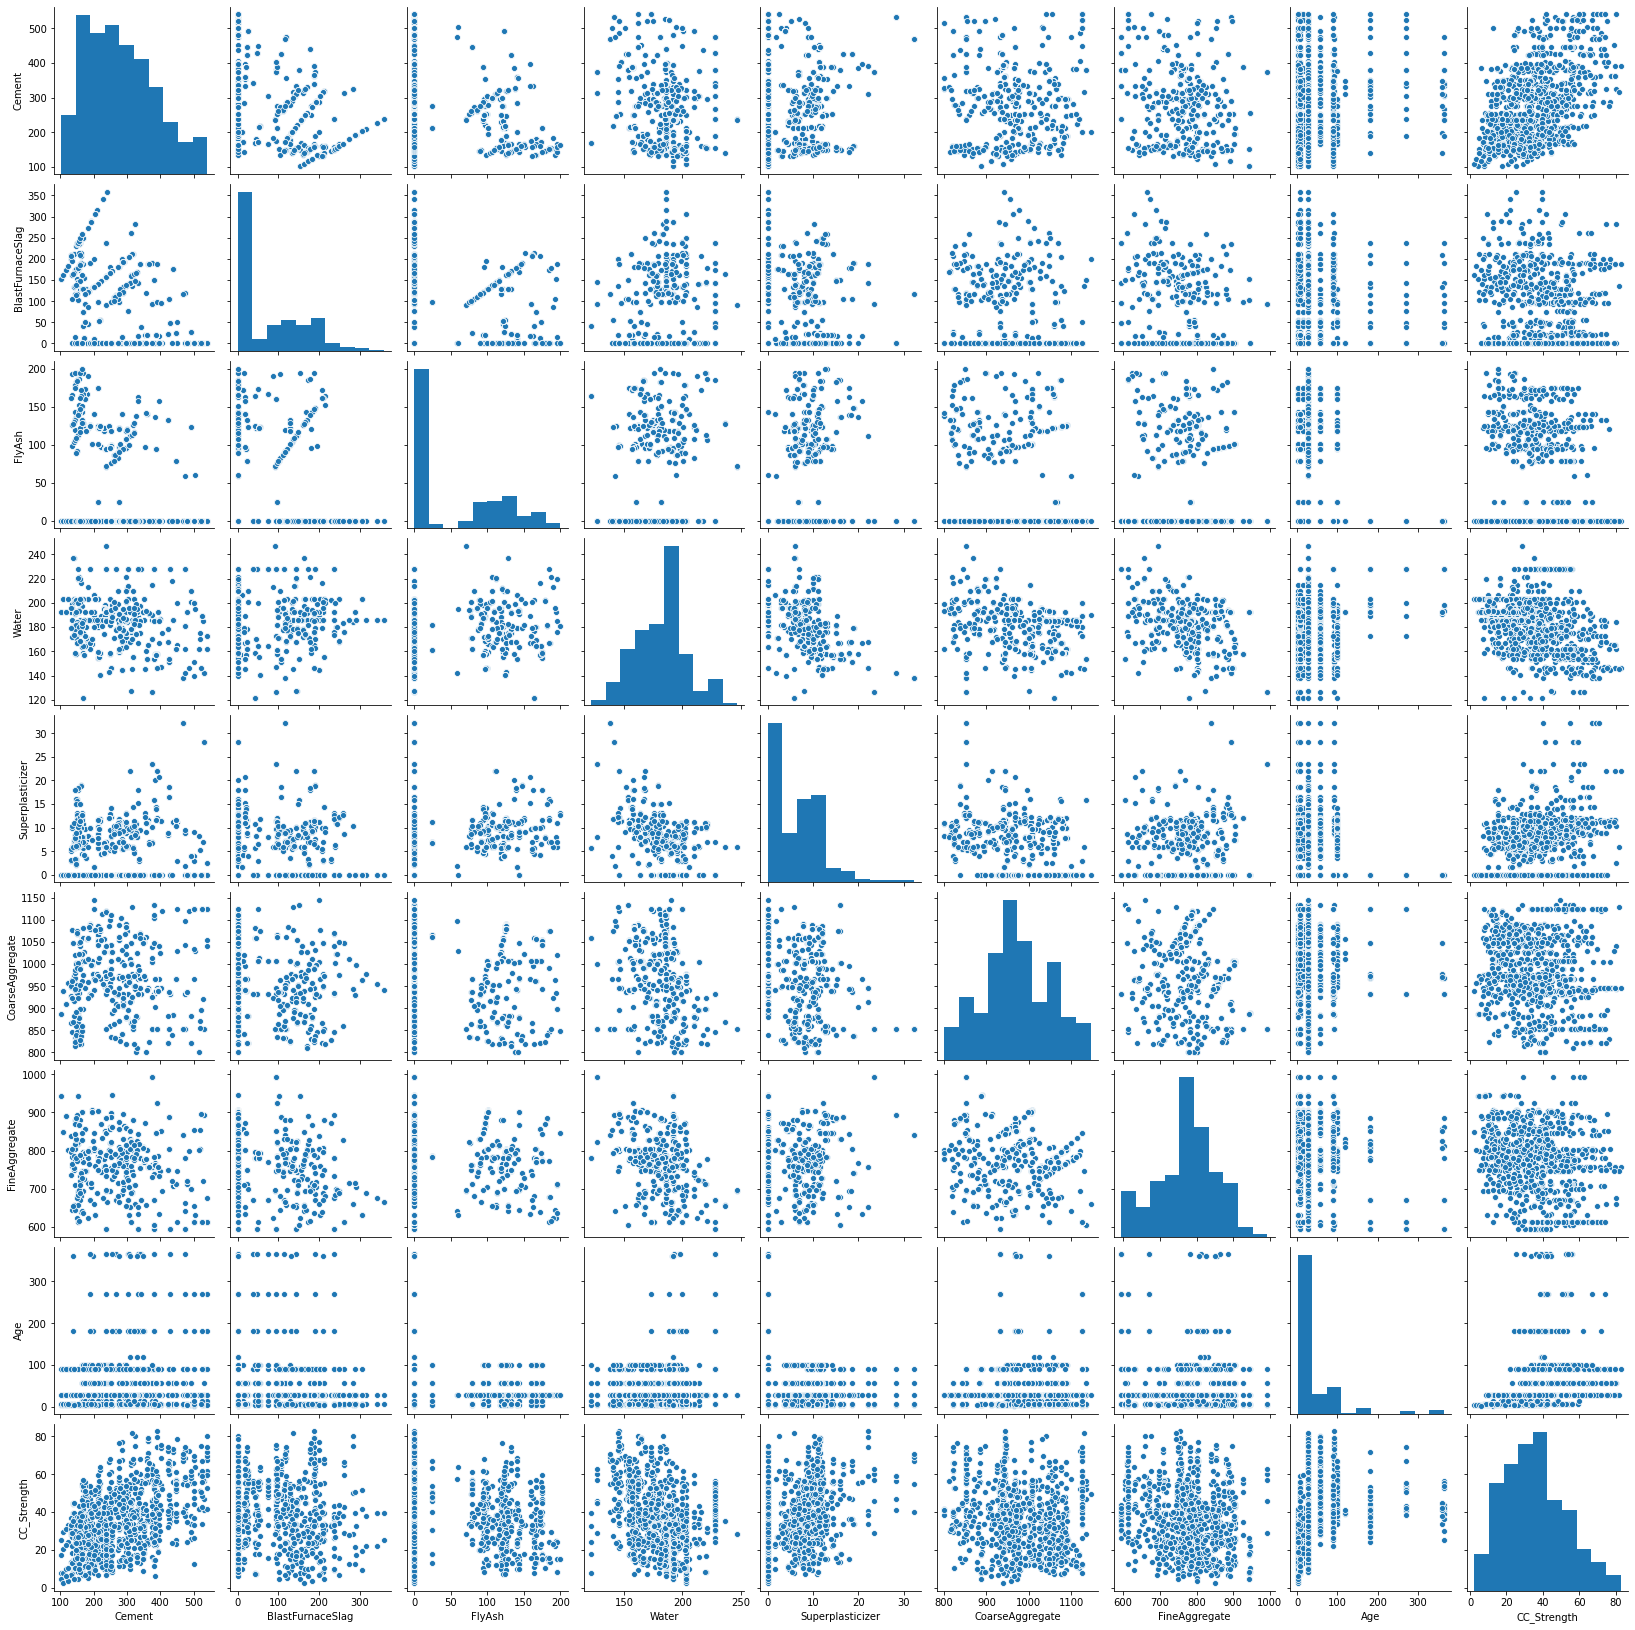

In [58]:
 import matplotlib.pyplot as plt    
 import seaborn as sns
 %matplotlib inline
 sns.pairplot(concreteData)
 plt.show()